### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

In [2]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Setting the plot size for all the figures
plt.rcParams['figure.figsize']=(8,6)

In [4]:
pd.set_option('display.max_columns',None)

### Importing the data

In [5]:
# Column Names:
cols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",  "wrong_fragment","urgent",
        "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
        "num_file_creations",  "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login",
        "count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", 
        "diff_srv_rate", "srv_diff_host_rate", "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",  
        "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
        "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"] 


In [6]:
# Train dataset:

train = pd.read_table('Train.txt',sep=',',header=None, names=cols)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
# Test data:

test = pd.read_table('Test.txt', sep=',', header=None, names=cols)
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### Data Exploration

In [9]:
train.shape

(125973, 43)

In [10]:
test.shape

(22544, 43)

In [11]:
print('The train data set has {} records and {} columns.'. format(train.shape[0], train.shape[1]))
print('The test data set has {} records and {} columns.'. format(test.shape[0], test.shape[1]))

The train data set has 125973 records and 43 columns.
The test data set has 22544 records and 43 columns.


In [12]:
features = [c for c in train.columns if c not in 'attack']
print('The dataset contains {} features.'.format(len(features)))

The dataset contains 42 features.


#### Converting Variales to Binary Categorical Variables: 

In [13]:
binary_vars = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

def bin_cat(df):
    for i in binary_vars:
        df[i] = df[i].astype('category')
    return df[i].dtypes

In [14]:
# converting for the train dataset:
bin_cat(train)

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
# converting for the test dataset:
bin_cat(test)

CategoricalDtype(categories=[0, 1], ordered=False)

#### Summary Statistics

In [16]:
# Data Summary for continuous variables:

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [17]:
num_features = train.select_dtypes([np.number])
num_features.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03
num_root,125973.0,0.0,3.806800e+04,0.302192,0.00,2.439962e+01,5.953414e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.0,1.596000e+03,0.012669,0.00,4.839351e-01,2.341932e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.300000e+01


In [18]:
# Summary Statistics for Numerical Variables in Train data: 
train.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.302192,0.012669,0.000413,0.004096,0.0,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,24.399618,0.483935,0.022181,0.099370,0.0,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,7468.000000,43.000000,2.000000,9.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [19]:
num_features = test.select_dtypes([np.number])
num_features.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22544.0,0.0,4.933959e+06,218.859076,0.00,1407.176612,1.980146e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,4.00,283.00,7589.5700,57715.0
src_bytes,22544.0,0.0,2.343550e+08,10395.450231,54.00,472786.431088,2.235270e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.0000,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22544.0,0.0,4.635089e+07,2056.018808,46.00,21219.297609,4.502586e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.0000,4099.10,8314.00,26032.0400,1345927.0
wrong_fragment,22544.0,0.0,1.900000e+02,0.008428,0.00,0.142599,2.033441e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,3.0
urgent,22544.0,0.0,1.600000e+01,0.000710,0.00,0.036473,1.330286e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,3.0
hot,22544.0,0.0,2.376000e+03,0.105394,0.00,0.928428,8.619786e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,2.0000,101.0
num_failed_logins,22544.0,0.0,4.880000e+02,0.021647,0.00,0.150328,2.259843e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,1.0000,4.0
num_compromised,22544.0,0.0,2.703000e+03,0.119899,0.00,7.269597,5.284704e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,1.0000,796.0
num_root,22544.0,0.0,2.585000e+03,0.114665,0.00,8.041614,6.466755e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,878.0
num_file_creations,22544.0,0.0,1.970000e+02,0.008738,0.00,0.676842,4.581146e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,100.0


In [20]:
# Summary Statistics for Numerical Variables in Test data: 
test.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.008428,0.000710,0.105394,0.021647,0.119899,0.114665,0.008738,0.001153,0.003549,0.0,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.142599,0.036473,0.928428,0.150328,7.269597,8.041614,0.676842,0.048014,0.067829,0.0,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,3.000000,3.000000,101.000000,4.000000,796.000000,878.000000,100.000000,5.000000,4.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [18]:
# Summary Statistics for Categorical Variables in Train data: 
train.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,2,2,3,2,2,23
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,76121,125804,125893,125972,124786,67343


In [19]:
# Summary Statistics for Categorical Variables in Test data: 
test.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,22544,22544,22544,22544,22544,22544,22544,22544,22544,22544
unique,3,64,11,2,2,2,3,2,2,38
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,18880,7853,14875,22537,12575,22489,22540,22533,21903,9711


From the summary statistics we see num_outbound_cmds has no value. It has only 0 values, hence dropping the column from both the train and test data.

In [20]:
train.num_outbound_cmds.value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [21]:
test.num_outbound_cmds.value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [22]:
# Removing num_outbound_cmds from train set:

train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [23]:
# Removing num_outbound_cmds from test set:

test.drop(['num_outbound_cmds'], axis=1, inplace=True)

#### Missing Values

In [24]:
# checking for null values

total = train.isnull().sum()

count= len(train)

percent = (total/count)*100

missing_values_train = pd.concat([total, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_train = missing_values_train.sort_values('Count of Missing Values',ascending=False)
missing_values_train

,Count of Missing Values,Percentage of Missing Values
duration,0,0.0
dst_host_srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0
dst_host_count,0,0.0


In [25]:
# checking for null values

total = test.isnull().sum()

count= len(test)

percent = (total/count)*100

missing_values_test = pd.concat([total, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_test = missing_values_test.sort_values('Count of Missing Values',ascending=False)
missing_values_test

,Count of Missing Values,Percentage of Missing Values
duration,0,0.0
dst_host_srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0
dst_host_count,0,0.0


There are no missing values in the train and test data set.

#### Identifying the Variable Types

In [26]:
# Numerical Variables:
num_features = train.dtypes[(train.dtypes == 'int64') | (train.dtypes == 'float64')].index.to_list()
print(num_features)

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']


In [27]:
# Categorical Variables:

cat_features = train.dtypes[train.dtypes == 'object'].index.to_list()
print(cat_features)

['protocol_type', 'service', 'flag', 'attack']


In [28]:
# Binary Variables:

binary_features = train.dtypes[train.dtypes == 'category'].index.to_list()
print(binary_features)

['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


On comparing the unique categories of Test and Train data, we see there are 6 categories missing in the test dataset. Hence, will identify those and add that in the test dataset. For the attack column as well there are 15 categories missing in the test data set. However, will be labeling 1 ad 0s against the attack column to derive the Target column, hence will take care of the missing categories in the attack column at that time. '

In [29]:
train.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,2,2,3,2,2,23
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,76121,125804,125893,125972,124786,67343


In [30]:
test.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,22544,22544,22544,22544,22544,22544,22544,22544,22544,22544
unique,3,64,11,2,2,2,3,2,2,38
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,18880,7853,14875,22537,12575,22489,22540,22533,21903,9711


In [31]:
service_train = train.service.value_counts().index.to_list()
service_test = test.service.value_counts().index.to_list()

In [32]:
# Missing Categories in Serivce column:
missing_service_cat = [i for i in service_train if i not in service_test]
missing_service_cat

['urh_i', 'red_i', 'harvest', 'http_8001', 'aol', 'http_2784']

The above six categories are missing in the Test dataset under the Service column. However, we can not add directly add to the test data in the present form of the Test data set. We shall add these post the data preprocessing step of creating dummy variables.

In [33]:
attack_train = train.attack.value_counts().index.to_list()
attack_test = test.attack.value_counts().index.to_list()

In [34]:
# Missing Categories in Attack column:
missing_attack_cat = [i for i in attack_train if i not in attack_test]
missing_attack_cat

['warezclient', 'spy']

### Target Variable 

In this case, will have 5 classes where the activity is defined as: normal, DoS, Probe, R2L, U2R. Hence, the target variable will have Labels as 0,1,2,3,4 where 1 is normal.

In [35]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [36]:
# Applying attack class mappings to the dataset

train['attack_type'] = train.attack.apply(lambda x: mapping[x])
test['attack_type'] = test.attack.apply(lambda x : mapping[x])

In [37]:
train[['attack','attack_type']]

,attack,attack_type
0,normal,Normal
1,normal,Normal
2,neptune,DoS
3,normal,Normal
4,normal,Normal
...,...,...
125968,neptune,DoS
125969,normal,Normal
125970,normal,Normal
125971,neptune,DoS


In [38]:
# Creating Label for Train and Test dataset:
label_dict = {'DoS':0, 'Normal':1, 'Probe':2, 'R2L':3, 'U2R':4}

In [39]:
# Applying Label for Train and Test dataset: 

train['Label'] = train.attack_type.apply(lambda x: label_dict[x])
test['Label'] = test.attack_type.apply(lambda x : label_dict[x])

In [40]:
train[['attack_type','Label']].tail(10)

,attack_type,Label
125963,Normal,1
125964,DoS,0
125965,Normal,1
125966,DoS,0
125967,Normal,1
125968,DoS,0
125969,Normal,1
125970,Normal,1
125971,DoS,0
125972,Normal,1


### Target Distribtuion

In [41]:
# Attack Class Distribution
attack_type_freq_train = train[['attack_type']].apply(lambda x: x.value_counts())
attack_type_freq_test = test[['attack_type']].apply(lambda x: x.value_counts())

attack_type_freq_train['frequency_percent_train'] = round((100 * attack_type_freq_train / attack_type_freq_train.sum()),2)
attack_type_freq_test['frequency_percent_test'] = round((100 * attack_type_freq_test / attack_type_freq_test.sum()),2)

attack_type_dist = pd.concat([attack_type_freq_train, attack_type_freq_test], axis=1) 
attack_type_dist

,attack_type,frequency_percent_train,attack_type,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


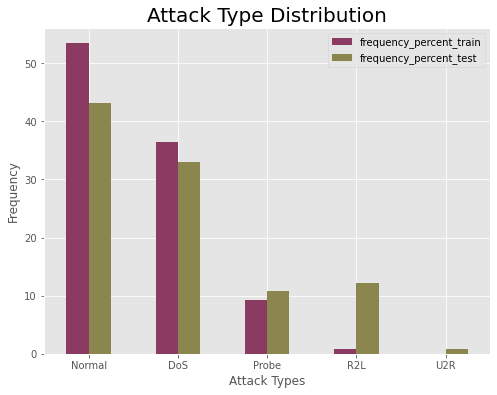

In [42]:
# Bar plot for Attack Type

attack_type_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar", color= ('#8b3a62', '#8b864e'))
plt.title("Attack Type Distribution", fontsize=20)
plt.xticks(rotation=0)
plt.xlabel('Attack Types')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Removing the attack variable from the train and test data:
train.drop(['attack'], inplace=True, axis=1)
test.drop(['attack'], inplace=True, axis=1)

In [44]:
# Removing the attack_type variable from the train and test data:
train.drop(['attack_type'], inplace=True, axis=1)
test.drop(['attack_type'], inplace=True, axis=1)

In [45]:
# Target Variable:

# Y train:

Y = train['Label']
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Label, dtype: int64

In [46]:
# Y_test:

Y_test = test['Label']
Y_test.head()

0    0
1    0
2    1
3    2
4    2
Name: Label, dtype: int64

### Exploratory Data Analysis

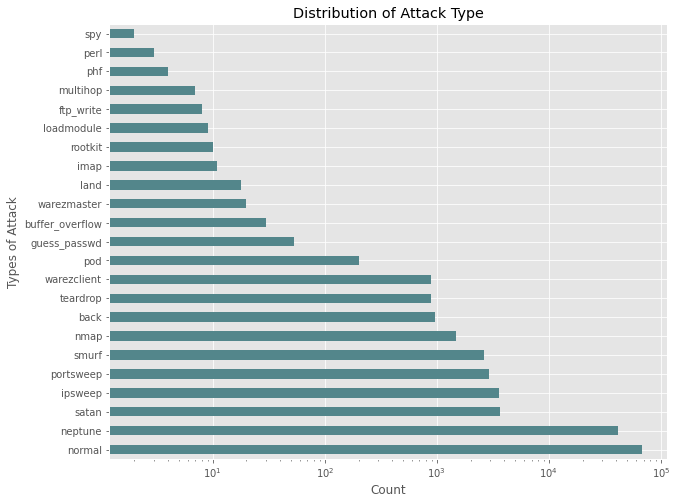

In [24]:
plt.figure(figsize = (10,8))
plt.xscale("log")
train.attack.value_counts().plot(kind='barh', color= '#53868b')
plt.xlabel('Count')
plt.ylabel('Types of Attack')
plt.title('Distribution of Attack Type')
plt.show()

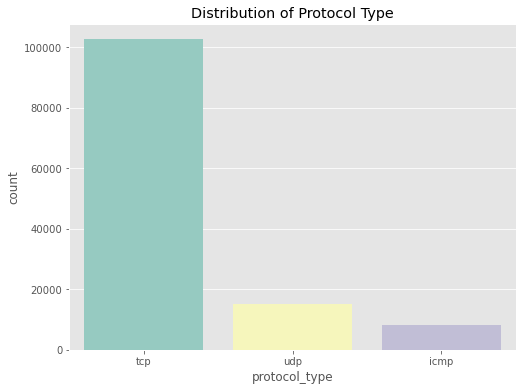

In [25]:
sns.countplot(train.protocol_type, palette='Set3')
plt.title('Distribution of Protocol Type')
plt.show()

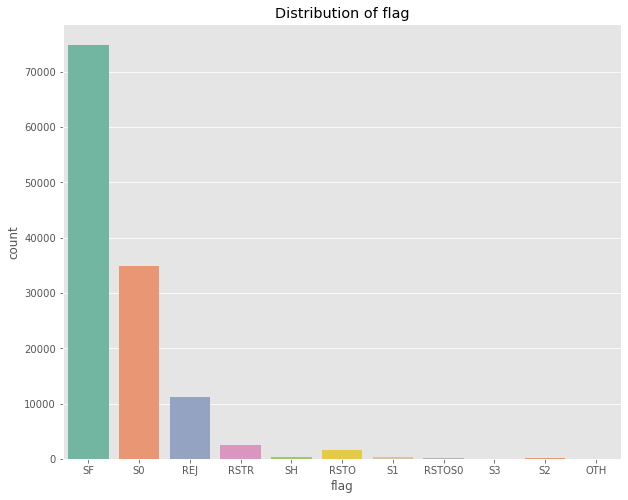

In [26]:
plt.figure(figsize = (10,8))
sns.countplot(train.flag,palette='Set2' )
plt.title('Distribution of flag')
plt.show()

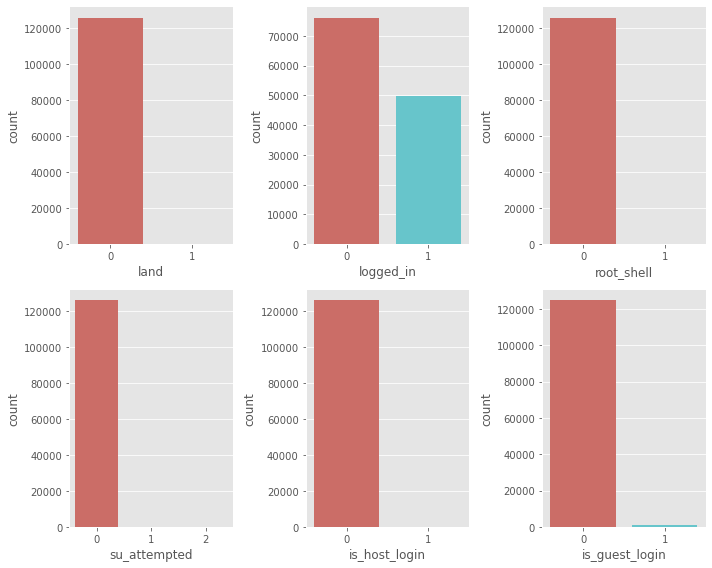

In [27]:
# Subplots showing Barplot for the binary categorical features:

fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize=(10, 8))

for i,j in zip(binary_vars, ax.flatten()):
    sns.countplot(train[i], ax=j, palette='hls')
    plt.tight_layout()

plt.show()

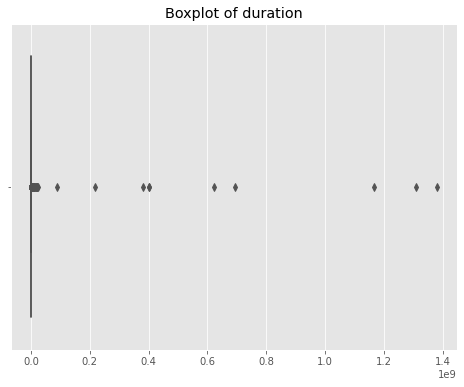

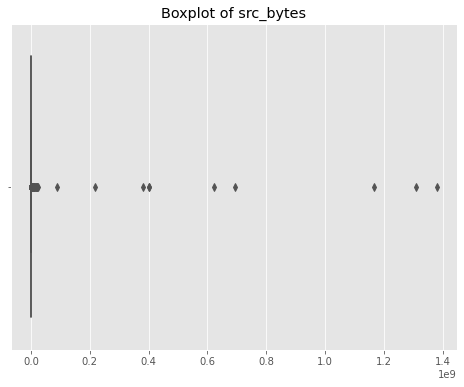

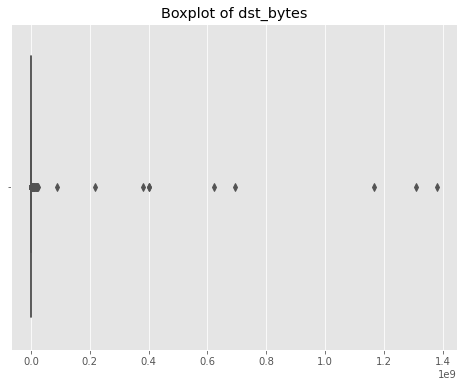

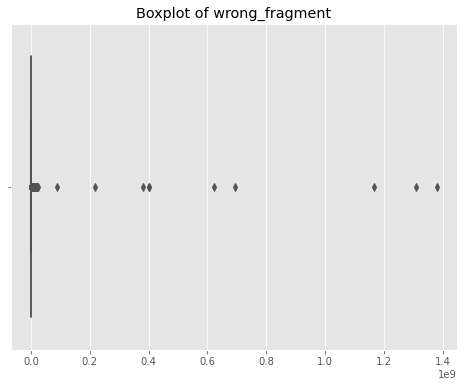

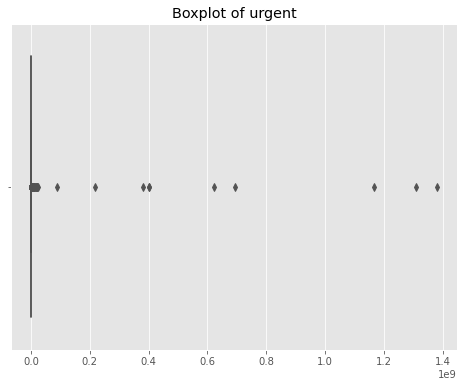

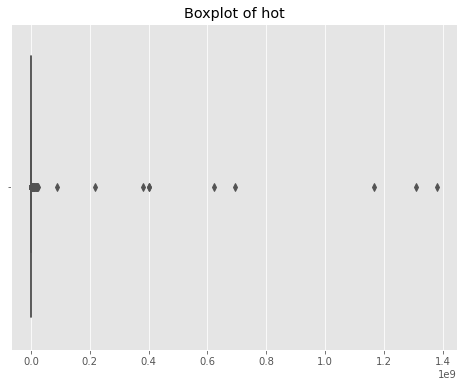

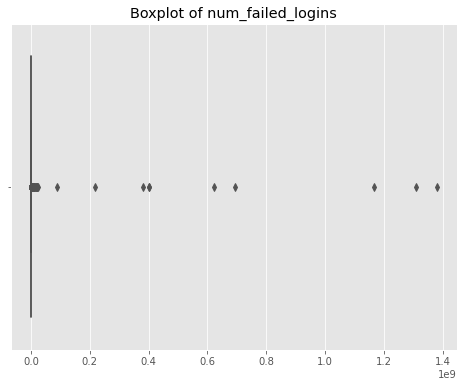

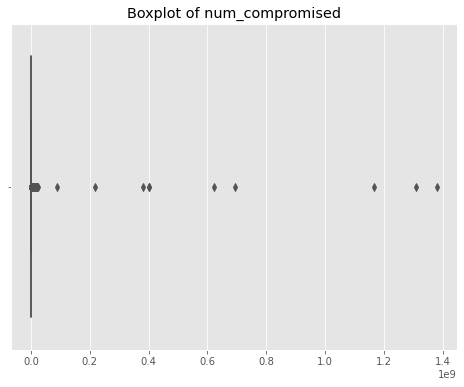

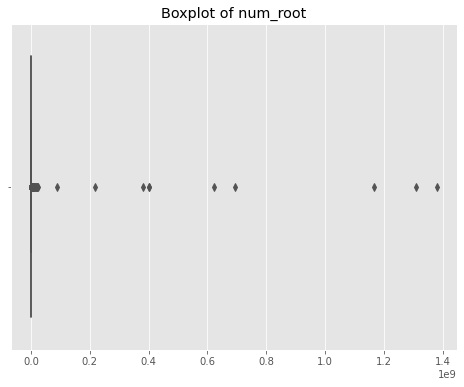

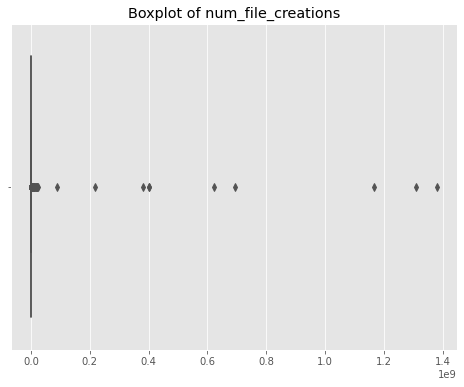

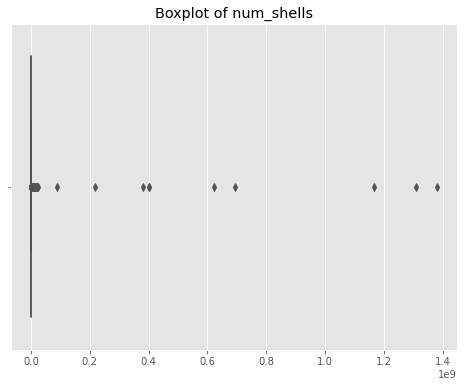

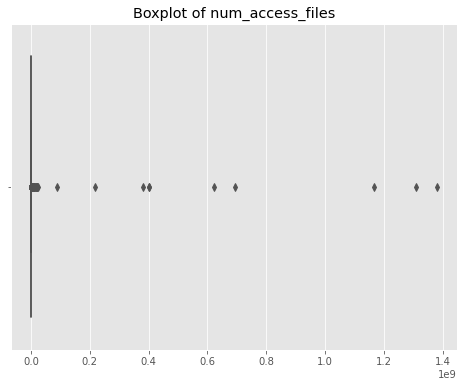

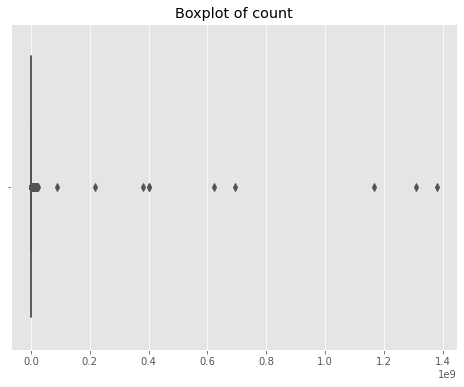

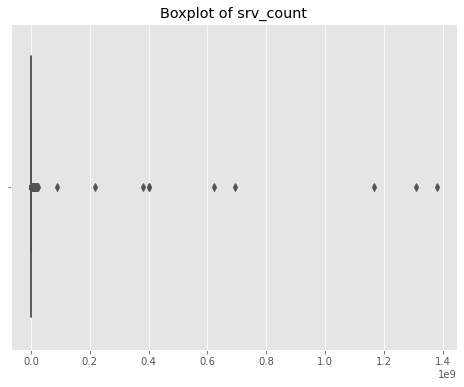

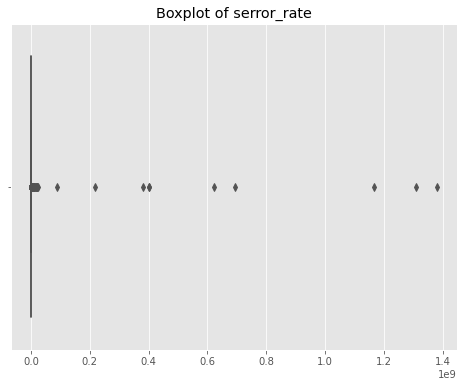

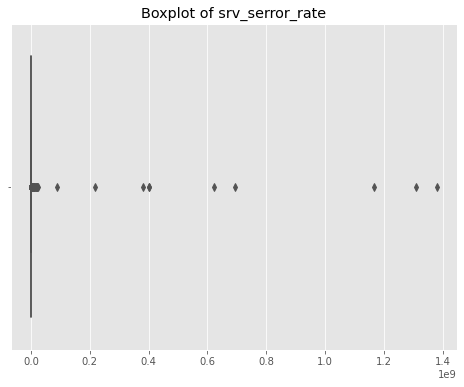

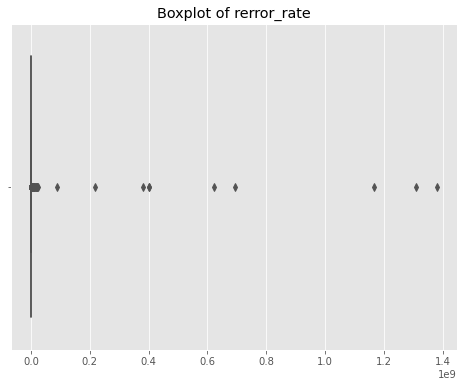

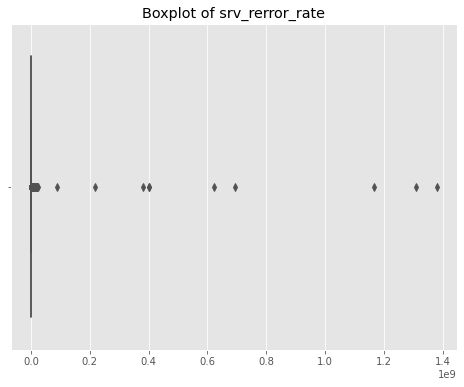

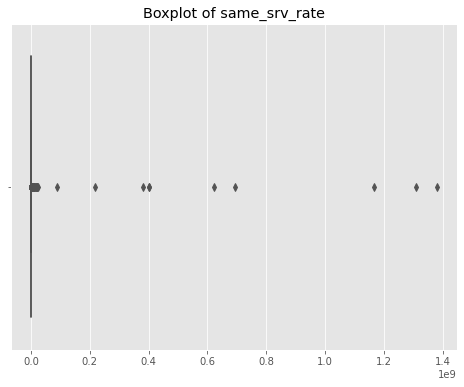

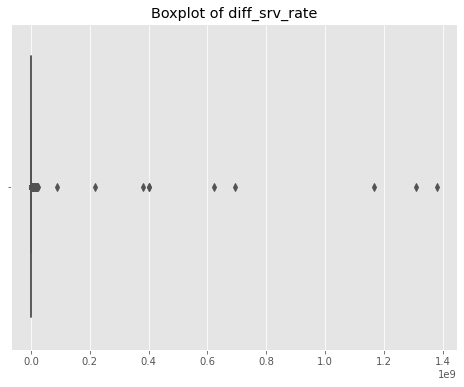

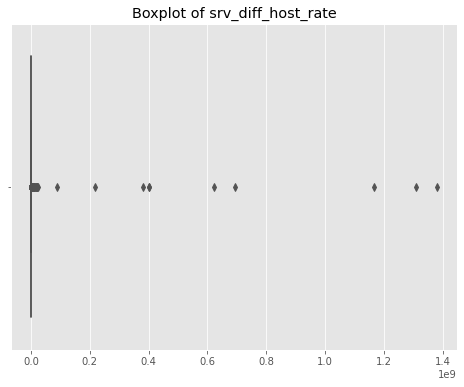

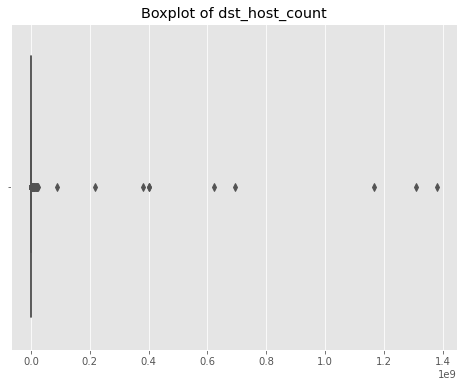

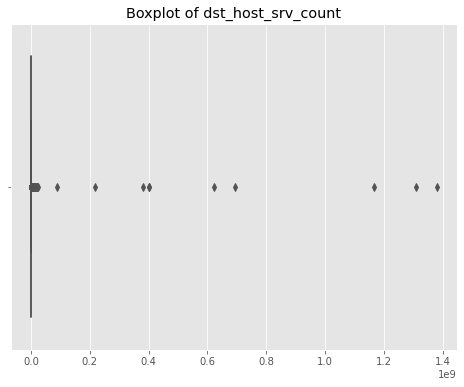

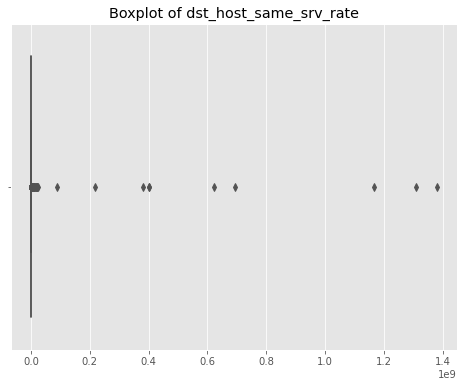

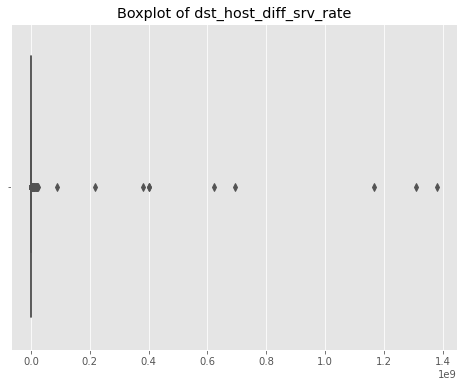

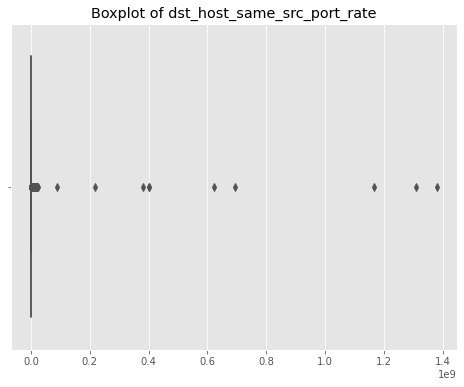

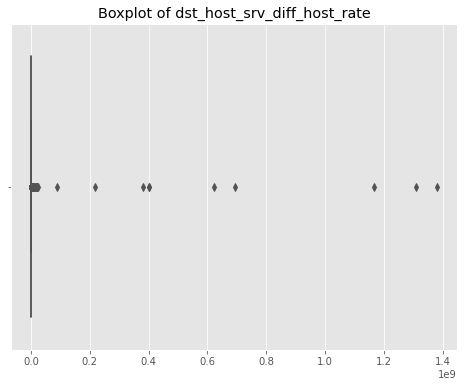

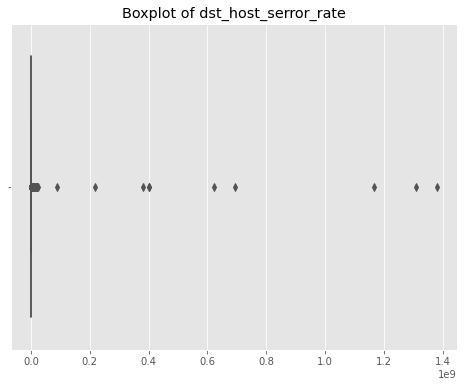

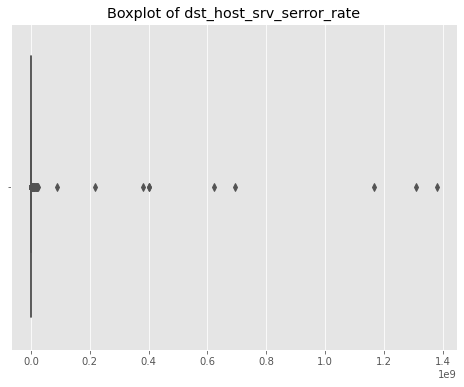

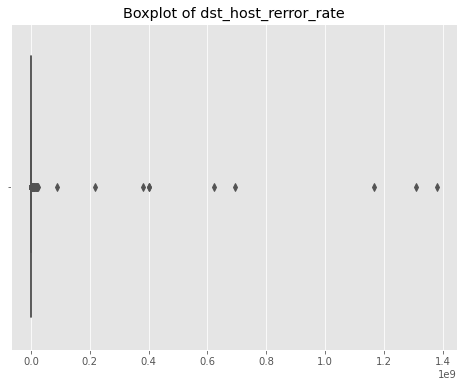

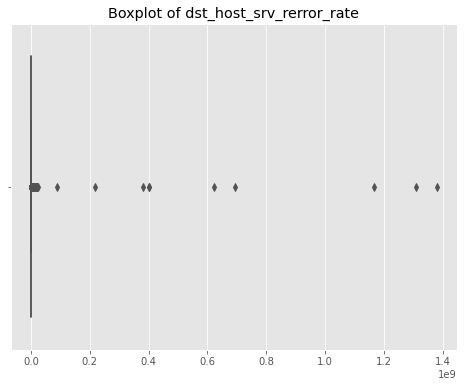

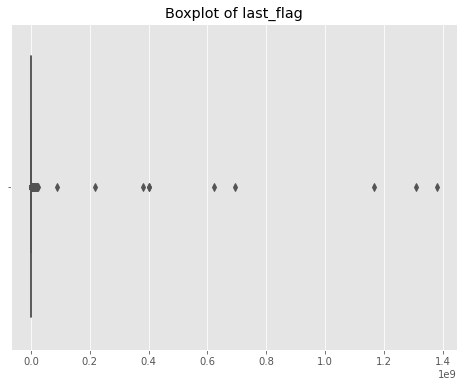

In [49]:
plt.rcParams['figure.figsize']=(8,6)
for i in num_features:
    sns.boxplot(train[num_features])
    plt.title('Boxplot of {}'.format(i))
    plt.show() 

The above boxplots shows the presence of outliers however, shall choose to leave these as the values are mostly between 0 and 1 can lead to wrong predictions if cap these outliers.

In [50]:
# Pairplot to show the relationship between the target variable and features:
# sns.pairplot(train, hue='Label')
# plt.title('Pairplot')
#plt.show()

#### Scaling the numerical Features

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
SS = StandardScaler()

num_scaled = SS.fit_transform(train[num_features])

df_num_scaled = pd.DataFrame(num_scaled, columns = num_features).reset_index(drop=True)

#### Dummy Creation of the categorical Features

In [54]:
x_dummy  = pd.get_dummies(train[['protocol_type', 'service', 'flag']], drop_first = True)

x_dummy  = x_dummy.reset_index(drop=True)

In [55]:
x_binary = train[binary_features]

x_binary = x_binary.reset_index(drop=True)

In [56]:
#### Concatenating all the binary features, dummy and scaled dataset:

x_final = pd.concat([df_num_scaled, x_dummy, x_binary], axis=1)
x_final.shape

(125973, 119)

In [57]:
x_final.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,-0.110249,-0.007679,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.110249,-0.007737,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,-0.110249,-0.007728,-0.004814,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.012385,-0.02618,-0.01861,-0.041221,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823,1,0,0,0,0,0,0,0

#### Applying the same preprocessing steps on the Test Data

In [58]:
# Scaling the numerical variables:

SS = StandardScaler()

num_scaled_test = SS.fit_transform(test[num_features])

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = num_features).reset_index(drop=True)

In [59]:
# Creating dummy variables for the categorical variables:

x_dummy_test  = pd.get_dummies(test[['protocol_type', 'service', 'flag']], drop_first = True)

x_dummy_test  = x_dummy_test.reset_index(drop=True)

In [60]:
x_binary_test = test[binary_features]

x_binary_test = x_binary_test.reset_index(drop=True)

In [61]:
#### Concatenating all the binary features, dummy and scaled dataset:

x_final_test = pd.concat([df_num_scaled_test, x_dummy_test, x_binary_test], axis=1)
x_final_test.shape

(22544, 113)

#### Adding the missing six service categories in the Test dataset 

In [62]:
# the missing categories were:
missing_service_cat

['urh_i', 'red_i', 'harvest', 'http_8001', 'aol', 'http_2784']

In [63]:
# Adding string services_ infront of each missing category:
string = 'service_'
missing_service_cat = [string + x for x in missing_service_cat]
missing_service_cat

['service_urh_i',
 'service_red_i',
 'service_harvest',
 'service_http_8001',
 'service_aol',
 'service_http_2784']

In [64]:
# Adding the missing categories column to the test data:
for col in missing_service_cat:
    x_final_test[col] = 0

x_final_test.shape

(22544, 119)

In [65]:
# Importing Libraries:

from sklearn.linear_model import LogisticRegression

# importing classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import auc, precision_score, recall_score

# Cross Validation, gridsearch
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,learning_curve, ShuffleSplit

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For to feature selection 
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif

# For faster processing
from sklearn.pipeline import Pipeline

### Building Model on All the features

In [66]:
# Logistic Regression
LR = LogisticRegression(n_jobs=-1, random_state = 0)
LR.fit(x_final, Y)
LR_pred = LR.predict(x_final_test)

# Decision Tree 
DT_full = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DT_full.fit(x_final, Y)
dt_pred = DT_full.predict(x_final_test)

# Random Forest
RF = RandomForestClassifier(n_estimators = 51, criterion = 'entropy', random_state = 0)
RF.fit(x_final, Y)
RF_pred = RF.predict(x_final_test)

# K-Nearest Neighbor
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors = 8)
knn.fit(x_final, Y)
knn_pred = knn.predict(x_final_test)

# Bernoulli Naive Bayes
NB = BernoulliNB()
NB.fit(x_final, Y)
NB_pred = NB.predict(x_final_test)

In [67]:
# Ada Boost
AB = AdaBoostClassifier(n_estimators=51,random_state=0)
AB.fit(x_final, Y)
AB_pred = AB.predict(x_final_test)

# Gradient Boosting Boost
GB = GradientBoostingClassifier(n_estimators=100,random_state=0)
GB.fit(x_final, Y)
GB_pred = GB.predict(x_final_test)

### Model Evaluation

In case of Network Intrusion Dectection system, we have to reduce the false negatives that is we have to be careful that a network that is actually an attack is not predicted as safe. For this, we must aim for high Recall and Low Precision.

In [68]:
print('================================= Model Evaluation of Logistic Regression ==============================')
print('')
accuracy_LR = accuracy_score(Y_test, LR_pred)
print('Accuracy Score of Logistic Tree:',accuracy_LR)
print('')

precision_score_lr = precision_score(Y_test, LR_pred, average='weighted')
print('Precision Score:',precision_score_lr)
print('')

recall_score_lr = recall_score(Y_test, LR_pred, average='weighted')
print('Recall Score:',recall_score_lr)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, LR_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, LR_pred))
print('')

================================= Model Evaluation of Logistic Regression ==============================

Accuracy Score of Logistic Tree: 0.7226756564939674

Precision Score: 0.7241935818062165

Recall Score: 0.7226756564939674

Confusion Matrix:
[[5100 2333   23    2    0]
 [  64 9428  216    3    0]
 [  88  572 1761    0    0]
 [   1 2666   84    3    0]
 [   2  172   26    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      7458
           1       0.62      0.97      0.76      9711
           2       0.83      0.73      0.78      2421
           3       0.38      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.72     22544
   macro avg       0.56      0.48      0.47     22544
weighted avg       0.72      0.72      0.68     22544




In [69]:
print('================================= Model Evaluation of Decision Tree ==============================')
print('')
accuracy_dt = accuracy_score(Y_test,dt_pred)
print('Accuracy Score of Decision Tree:',accuracy_dt)
print('')

precision_score_DT = precision_score(Y_test, dt_pred, average='weighted')
print('Precision Score:',precision_score_DT)
print('')

recall_score_DT = recall_score(Y_test, dt_pred, average='weighted')
print('Recall Score:',recall_score_DT)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, dt_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, dt_pred))
print('')

================================= Model Evaluation of Decision Tree ==============================

Accuracy Score of Decision Tree: 0.6709102200141944

Precision Score: 0.7103516610991999

Recall Score: 0.6709102200141944

Confusion Matrix:
[[5211 1233 1014    0    0]
 [ 233 8352 1122    4    0]
 [ 512  369 1540    0    0]
 [ 191 2014  527   22    0]
 [  98   45   55    2    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      7458
           1       0.70      0.86      0.77      9711
           2       0.36      0.64      0.46      2421
           3       0.79      0.01      0.02      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.67     22544
   macro avg       0.54      0.44      0.40     22544
weighted avg       0.71      0.67      0.63     22544




In [70]:
print('================================= Model Evaluation of Random Forest ==============================')
print('')
accuracy_RF = accuracy_score(Y_test, RF_pred)
print('Accuracy Score of Random Forest:',accuracy_RF)
print('')

precision_score_RF = precision_score(Y_test, RF_pred, average='weighted')
print('Precision Score:',precision_score_RF)
print('')

recall_score_RF = recall_score(Y_test, RF_pred, average='weighted')
print('Recall Score:',recall_score_RF)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, RF_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, RF_pred))
print('')

================================= Model Evaluation of Random Forest ==============================

Accuracy Score of Random Forest: 0.5552696948190206

Precision Score: 0.5949714410898034

Recall Score: 0.5552696948190206

Confusion Matrix:
[[1681 2566 3211    0    0]
 [  15 9445  251    0    0]
 [ 120  909 1392    0    0]
 [   0 2611  143    0    0]
 [   0  181   19    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.23      0.36      7458
           1       0.60      0.97      0.74      9711
           2       0.28      0.57      0.37      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.56     22544
   macro avg       0.36      0.35      0.30     22544
weighted avg       0.59      0.56      0.48     22544




In [71]:
print('================================= Model Evaluation of K-Nearest Neighbor ==============================')
print('')
accuracy_knn = accuracy_score(Y_test, knn_pred)
print('Accuracy Score of K-Nearest Neighbor:',accuracy_knn)
print('')

precision_score_knn = precision_score(Y_test, knn_pred, average='weighted')
print('Precision Score:',precision_score_knn)
print('')

recall_score_knn = recall_score(Y_test, knn_pred, average='weighted')
print('Recall Score:',recall_score_knn)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, knn_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, knn_pred))
print('')

================================= Model Evaluation of K-Nearest Neighbor ==============================

Accuracy Score of K-Nearest Neighbor: 0.7412171753016323

Precision Score: 0.7786962448557572

Recall Score: 0.7412171753016323

Confusion Matrix:
[[5806 1521  131    0    0]
 [  71 9476  163    1    0]
 [ 233  796 1392    0    0]
 [ 207 2345  167   35    0]
 [   5  125   63    6    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      7458
           1       0.66      0.98      0.79      9711
           2       0.73      0.57      0.64      2421
           3       0.83      0.01      0.03      2754
           4       1.00      0.01      0.01       200

    accuracy                           0.74     22544
   macro avg       0.83      0.47      0.46     22544
weighted avg       0.78      0.74      0.69     22544




In [72]:
print('================================= Model Evaluation of Naive Bayes ==============================')
accuracy_NB = accuracy_score(Y_test,NB_pred)
print('Accuracy Score of Naive Bayes:',accuracy_NB)
print('')

precision_score_NB = precision_score(Y_test, NB_pred, average='weighted')
print('Precision Score:',precision_score_NB)
print('')

recall_score_NB = recall_score(Y_test, NB_pred, average='weighted')
print('Recall Score:',recall_score_NB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, NB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, NB_pred))
print('')

================================= Model Evaluation of Naive Bayes ==============================
Accuracy Score of Naive Bayes: 0.5153921220723917

Precision Score: 0.8010909046451771

Recall Score: 0.5153921220723917

Confusion Matrix:
[[2430    2 4666   45  315]
 [   6 6448 3046   34  177]
 [ 447    3 1971    0    0]
 [   9  597  893  719  536]
 [   0    0  141    8   51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.33      0.47      7458
           1       0.91      0.66      0.77      9711
           2       0.18      0.81      0.30      2421
           3       0.89      0.26      0.40      2754
           4       0.05      0.26      0.08       200

    accuracy                           0.52     22544
   macro avg       0.58      0.46      0.40     22544
weighted avg       0.80      0.52      0.57     22544




In [73]:
print('================================= Model Evaluation of Ada Boost ==============================')
accuracy_AB = accuracy_score(Y_test, AB_pred)
print('Accuracy Score of Ada Boost:',accuracy_AB)
print('')

precision_score_AB = precision_score(Y_test, AB_pred, average='weighted')
print('Precision Score:',precision_score_AB)
print('')

recall_score_AB = recall_score(Y_test, AB_pred, average='weighted')
print('Recall Score:',recall_score_AB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, AB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, AB_pred))
print('')

================================= Model Evaluation of Ada Boost ==============================
Accuracy Score of Ada Boost: 0.4426011355571327

Precision Score: 0.38785032649797735

Recall Score: 0.4426011355571327

Confusion Matrix:
[[  48 6802  427  181    0]
 [  52 9365  294    0    0]
 [   0 1856  565    0    0]
 [   0 1279 1475    0    0]
 [   0  124   75    1    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.01      0.01      7458
           1       0.48      0.96      0.64      9711
           2       0.20      0.23      0.21      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.44     22544
   macro avg       0.23      0.24      0.17     22544
weighted avg       0.39      0.44      0.30     22544




In [74]:
print('================================= Model Evaluation of Gradient Boosting ==============================')
accuracy_GB = accuracy_score(Y_test, GB_pred)
print('Accuracy Score of Gradient Boosting:',accuracy_GB)
print('')

precision_score_GB = precision_score(Y_test, GB_pred, average='weighted')
print('Precision Score:',precision_score_GB)
print('')

recall_score_GB = recall_score(Y_test, GB_pred, average='weighted')
print('Recall Score:',recall_score_GB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, GB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, GB_pred))
print('')

================================= Model Evaluation of Gradient Boosting ==============================
Accuracy Score of Gradient Boosting: 0.6207860184528035

Precision Score: 0.6713376853482949

Recall Score: 0.6207860184528035

Confusion Matrix:
[[5031  921 1503    3    0]
 [  44 7222 2390   55    0]
 [ 159  540 1722    0    0]
 [   0 1418 1316   20    0]
 [   1  139   32   28    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      7458
           1       0.71      0.74      0.72      9711
           2       0.25      0.71      0.37      2421
           3       0.19      0.01      0.01      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.62     22544
   macro avg       0.42      0.43      0.38     22544
weighted avg       0.67      0.62      0.62     22544




#### Combining all the Results

In [75]:
models = []
models.append(('Logistic Regression', LR))
models.append(('Decision Tree', DT_full))
models.append(('RandomForest', RF))
models.append(('K-Nearest Neighbor', knn))
models.append(('Naive Bayes', NB))
models.append(('Ada Boost', AB))
models.append(('Gradient Boosting', GB))

In [76]:
# create dataframe 'metrics'

metrics_df = pd.DataFrame(columns=["Model_Name","Precision Score","Recall Score","Features_used"])


In [77]:
LogisticRegression = pd.Series({'Model_Name': 'Logistic Regression',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_lr,
                     'Recall Score': recall_score_lr})

DecisionTree = pd.Series({'Model_Name': 'Decision Tree',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_DT,
                      'Recall Score': recall_score_DT})

RandomForest = pd.Series({'Model_Name': 'Random Forest',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_RF,
                     'Recall Score': recall_score_RF})

KNearestNeighbor = pd.Series({'Model_Name': 'K-Nearest Neighbor',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_knn,
                     'Recall Score': recall_score_knn})

NaiveBayes = pd.Series({'Model_Name': 'Naive Bayes',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_NB,
                     'Recall Score': recall_score_NB})

AdaBoost = pd.Series({'Model_Name': 'Ada Boost',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_AB,
                     'Recall Score': recall_score_AB})

GradientBoosting = pd.Series({'Model_Name': 'Gradient Boosting',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_GB, 
                     'Recall Score': recall_score_GB})

In [78]:
# Appending all the results in the df:
metrics_df = metrics_df.append(LogisticRegression, ignore_index=True)
metrics_df = metrics_df.append(DecisionTree, ignore_index=True)
metrics_df = metrics_df.append(RandomForest, ignore_index=True)
metrics_df = metrics_df.append(KNearestNeighbor, ignore_index=True)
metrics_df = metrics_df.append(NaiveBayes, ignore_index=True)
metrics_df = metrics_df.append(AdaBoost, ignore_index=True)
metrics_df = metrics_df.append(GradientBoosting, ignore_index=True)

In [79]:
metrics_df

,Model_Name,Precision Score,Recall Score,Features_used
0,Logistic Regression,0.724194,0.722676,ALL
1,Decision Tree,0.710352,0.670910,ALL
2,Random Forest,0.594971,0.555270,ALL
3,K-Nearest Neighbor,0.778696,0.741217,ALL
4,Naive Bayes,0.801091,0.515392,ALL
5,Ada Boost,0.387850,0.442601,ALL
6,Gradient Boosting,0.671338,0.620786,ALL


In [80]:
df_model = metrics_df[["Model_Name","Precision Score","Recall Score","Features_used"]]
df_model.set_index(['Model_Name','Features_used'],drop=True,inplace=True)
df_model.unstack()
df_model.unstack().to_csv("Metrics_ML.csv")
print('The Metrics for all the models are:')
df_model

The Metrics for all the models are:


,,Precision Score,Recall Score
Model_Name,Features_used,,
Logistic Regression,ALL,0.724194,0.722676
Decision Tree,ALL,0.710352,0.670910
Random Forest,ALL,0.594971,0.555270
K-Nearest Neighbor,ALL,0.778696,0.741217
Naive Bayes,ALL,0.801091,0.515392
Ada Boost,ALL,0.387850,0.442601
Gradient Boosting,ALL,0.671338,0.620786


### Feature Selection

Using the following variable reduction techniques:

- Recursive Feature Elimination (RFE)
- SelectKBest

#### Recursive Feature Elimination (RFE)

In [81]:
RF_classifier = RandomForestClassifier()
rfe = RFE(RF_classifier, 15)
rfe = rfe.fit(x_final, Y)

In [82]:
imp_vars_RFE = list(x_final.columns[rfe.support_])
imp_vars_RFE

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'last_flag',
 'service_ecr_i',
 'flag_SF']

#### Select KBest

In [83]:
SKB = SelectKBest(f_classif, k=15).fit(x_final, Y)

In [84]:
SKB.get_support()
imp_vars_SKB = list(x_final.columns[SKB.get_support()])
imp_vars_SKB

['count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'last_flag',
 'service_http',
 'flag_S0',
 'flag_SF',
 'logged_in']

#### Final List (from RFE, SelectKbest)

In [85]:
Final_list = list(set(imp_vars_SKB + imp_vars_RFE))
Final_list

['dst_host_srv_count',
 'diff_srv_rate',
 'srv_count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'count',
 'service_http',
 'same_srv_rate',
 'srv_serror_rate',
 'last_flag',
 'src_bytes',
 'flag_S0',
 'flag_SF',
 'dst_host_same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'service_ecr_i',
 'logged_in',
 'dst_host_serror_rate',
 'serror_rate']

In [86]:
# Selecting the above features in both train and test dataset
x_new = x_final[Final_list]
x_new_test = x_final_test[Final_list]
x_new.head(2)
x_new_test.head(2)

,dst_host_srv_count,diff_srv_rate,srv_count,dst_bytes,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,service_http,same_srv_rate,srv_serror_rate,last_flag,src_bytes,flag_S0,flag_SF,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,service_ecr_i,logged_in,dst_host_serror_rate,serror_rate
0,-1.169697,-0.131492,-0.237191,-0.096896,-0.13837,-0.431856,1.166764,0,-1.697859,-0.34739,0.698325,-0.021988,0,0,-1.305370,-0.22998,-0.35275,0,0,-0.358118,-0.348468
1,-1.250212,-0.131492,-0.338246,-0.096896,-0.13837,-0.431856,0.443234,0,-1.770589,-0.34739,0.698325,-0.021988,0,0,-1.397181,-0.22998,-0.35275,0,0,-0.358118,-0.348468


In [87]:
print('x_train', x_new.shape)
print('y_train', Y.shape)
print('')
print('x_test', x_new_test.shape)
print('y_test', Y_test.shape)

x_train (125973, 21)
y_train (125973,)

x_test (22544, 21)
y_test (22544,)


In [88]:
Y_test

0        0
1        0
2        1
3        2
4        2
        ..
22539    1
22540    1
22541    0
22542    1
22543    2
Name: Label, Length: 22544, dtype: int64

### Building Model after Feature Selection

In [89]:
# Logistic Regression
#LR_FS = LogisticRegression(random_state = 0)
#LR_FS.fit(x_new, Y)
#LR_FS_pred = LR_FS.predict(x_new_test)

# Decision Tree 
DT_FS = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DT_FS.fit(x_new, Y)
DT_FS_pred = DT_FS.predict(x_new_test)

# Random Forest
RF_FS = RandomForestClassifier(n_estimators = 51, criterion = 'entropy', random_state = 0)
RF_FS.fit(x_new, Y)
RF_FS_pred = RF_FS.predict(x_new_test)

# K-Nearest Neighbor
knn_FS = KNeighborsClassifier(n_jobs=-1,n_neighbors = 8)
knn_FS.fit(x_new, Y)
knn_FS_pred = knn_FS.predict(x_new_test)

# Bernoulli Naive Bayes
NB_FS = BernoulliNB()
NB_FS.fit(x_new, Y)
NB_FS_pred = NB_FS.predict(x_new_test)

In [90]:
# Ada Boost
AB_FS = AdaBoostClassifier(n_estimators=51,random_state=0)
AB_FS.fit(x_new, Y)
AB_FS_pred = AB_FS.predict(x_new_test)

# Gradient Boosting Boost
GB_FS = GradientBoostingClassifier(n_estimators=100,random_state=0)
GB_FS.fit(x_new, Y)
GB_FS_pred = GB_FS.predict(x_new_test)

In [91]:
## Train Ensemble Model 
combined_model_1 = [('Decision Tree Classifier', DT_FS),
                  ('RandomForest Classifier', RF_FS),
                  ('K Nearest Neighbors', knn_FS),
                  ('Naive Baye Classifier', NB_FS),
                  ('Ada Boost', AB_FS),
                  ('Gradient Boosting', GB_FS)]

VC_FS =  VotingClassifier(estimators = combined_model_1,voting = 'soft', n_jobs=-1)
VC_FS.fit(x_new, Y)
VC_FS_pred = VC_FS.predict(x_new_test)

### Model Evaluation on Feature Selected model

In [92]:
print('================================= Model Evaluation of Decision Tree ==============================')
print('')
accuracy_dt_FS = accuracy_score(Y_test, DT_FS_pred)
print('Accuracy Score of Decision Tree:',accuracy_dt_FS)
print('')

precision_score_DT_FS = precision_score(Y_test, dt_pred, average='weighted')
print('Precision Score:',precision_score_DT_FS)
print('')

recall_score_DT_FS = recall_score(Y_test, dt_pred, average='weighted')
print('Recall Score:',recall_score_DT_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, DT_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, DT_FS_pred))
print('')

================================= Model Evaluation of Decision Tree ==============================

Accuracy Score of Decision Tree: 0.6806689141234918

Precision Score: 0.7103516610991999

Recall Score: 0.6709102200141944

Confusion Matrix:
[[5138 1500  770   50    0]
 [ 176 8426 1007  102    0]
 [ 460  170 1616  175    0]
 [ 130 2155  302  165    2]
 [ 100   31   62    7    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.76      7458
           1       0.69      0.87      0.77      9711
           2       0.43      0.67      0.52      2421
           3       0.33      0.06      0.10      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.68     22544
   macro avg       0.46      0.46      0.43     22544
weighted avg       0.67      0.68      0.65     22544




In [93]:
print('================================= Model Evaluation of Random Forest ==============================')
print('')
accuracy_RF_FS = accuracy_score(Y_test, RF_FS_pred)
print('Accuracy Score of Random Forest:',accuracy_RF_FS)
print('')

precision_score_RF_FS = precision_score(Y_test, RF_pred, average='weighted')
print('Precision Score:',precision_score_RF_FS)
print('')

recall_score_RF_FS = recall_score(Y_test, RF_pred, average='weighted')
print('Recall Score:',recall_score_RF_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, RF_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, RF_FS_pred))
print('')

================================= Model Evaluation of Random Forest ==============================

Accuracy Score of Random Forest: 0.7134492547906317

Precision Score: 0.5949714410898034

Recall Score: 0.5552696948190206

Confusion Matrix:
[[5163 2205   90    0    0]
 [  16 9425  270    0    0]
 [ 168  757 1496    0    0]
 [   0 2590  164    0    0]
 [   0  148   52    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      7458
           1       0.62      0.97      0.76      9711
           2       0.72      0.62      0.67      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.71     22544
   macro avg       0.46      0.46      0.45     22544
weighted avg       0.67      0.71      0.67     22544




In [94]:
print('================================= Model Evaluation of K-Nearest Neighbor ==============================')
print('')
accuracy_knn_FS = accuracy_score(Y_test, knn_FS_pred)
print('Accuracy Score of K-Nearest Neighbor:',accuracy_knn_FS)
print('')

precision_score_KNN_FS = precision_score(Y_test, knn_pred, average='weighted')
print('Precision Score:',precision_score_KNN_FS)
print('')

recall_score_KNN_FS = recall_score(Y_test, knn_pred, average='weighted')
print('Recall Score:',recall_score_KNN_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, knn_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, knn_FS_pred))
print('')

================================= Model Evaluation of K-Nearest Neighbor ==============================

Accuracy Score of K-Nearest Neighbor: 0.7574077359829666

Precision Score: 0.7786962448557572

Recall Score: 0.7412171753016323

Confusion Matrix:
[[5802 1504   86   66    0]
 [  73 9507  131    0    0]
 [ 189  730 1502    0    0]
 [ 240 1889  361  264    0]
 [  19   73   83   25    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      7458
           1       0.69      0.98      0.81      9711
           2       0.69      0.62      0.66      2421
           3       0.74      0.10      0.17      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.76     22544
   macro avg       0.61      0.49      0.50     22544
weighted avg       0.77      0.76      0.72     22544




In [95]:
print('================================= Model Evaluation of Naive Bayes ==============================')
accuracy_NB_FS = accuracy_score(Y_test,NB_FS_pred)
print('Accuracy Score of Naive Bayes:',accuracy_NB_FS)
print('')

precision_score_NB_FS = precision_score(Y_test, NB_pred, average='weighted')
print('Precision Score:',precision_score_NB_FS)
print('')

recall_score_NB_FS = recall_score(Y_test, NB_pred, average='weighted')
print('Recall Score:',recall_score_NB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, NB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, NB_FS_pred))
print('')

================================= Model Evaluation of Naive Bayes ==============================
Accuracy Score of Naive Bayes: 0.7256476224272533

Precision Score: 0.8010909046451771

Recall Score: 0.5153921220723917

Confusion Matrix:
[[5099 1936  423    0    0]
 [   8 9166  502   35    0]
 [ 556   63 1797    5    0]
 [   8 1864  585  297    0]
 [   0   42  139   19    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      7458
           1       0.70      0.94      0.80      9711
           2       0.52      0.74      0.61      2421
           3       0.83      0.11      0.19      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.73     22544
   macro avg       0.59      0.50      0.48     22544
weighted avg       0.76      0.73      0.69     22544




In [96]:
print('================================= Model Evaluation of Ada Boost ==============================')
accuracy_AB_FS = accuracy_score(Y_test, AB_FS_pred)
print('Accuracy Score of Ada Boost:',accuracy_AB_FS)
print('')

precision_score_AB_FS = precision_score(Y_test, AB_pred, average='weighted')
print('Precision Score:',precision_score_AB_FS)
print('')

recall_score_AB_FS = recall_score(Y_test, AB_pred, average='weighted')
print('Recall Score:',recall_score_AB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, AB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, AB_FS_pred))
print('')

================================= Model Evaluation of Ada Boost ==============================
Accuracy Score of Ada Boost: 0.4687278211497516

Precision Score: 0.38785032649797735

Recall Score: 0.4426011355571327

Confusion Matrix:
[[ 773 6598   87    0    0]
 [ 148 9321  242    0    0]
 [   0 1955  466    0    0]
 [ 235 2053  455    0   11]
 [   5  146   42    0    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.10      0.18      7458
           1       0.46      0.96      0.63      9711
           2       0.36      0.19      0.25      2421
           3       0.00      0.00      0.00      2754
           4       0.39      0.04      0.06       200

    accuracy                           0.47     22544
   macro avg       0.38      0.26      0.22     22544
weighted avg       0.46      0.47      0.36     22544




In [97]:
print('================================= Model Evaluation of Gradient Boosting ==============================')
accuracy_FS_GB = accuracy_score(Y_test, GB_FS_pred)
print('Accuracy Score of Gradient Boosting:',accuracy_FS_GB)
print('')

precision_score_GB_FS = precision_score(Y_test, GB_pred, average='weighted')
print('Precision Score:',precision_score_GB_FS)
print('')

recall_score_GB_FS = recall_score(Y_test, GB_pred, average='weighted')
print('Recall Score:',recall_score_GB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, GB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, GB_FS_pred))
print('')

================================= Model Evaluation of Gradient Boosting ==============================
Accuracy Score of Gradient Boosting: 0.6992991483321505

Precision Score: 0.6713376853482949

Recall Score: 0.6207860184528035

Confusion Matrix:
[[5391 1663  404    0    0]
 [ 623 8816  246   26    0]
 [ 211  768 1442    0    0]
 [   4 2590   44  116    0]
 [   0  197    1    2    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      7458
           1       0.63      0.91      0.74      9711
           2       0.67      0.60      0.63      2421
           3       0.81      0.04      0.08      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.70     22544
   macro avg       0.59      0.45      0.45     22544
weighted avg       0.73      0.70      0.66     22544




In [98]:
print('================================= Model Evaluation of Voting Classifier ==============================')
accuracy_VC_FS = accuracy_score(Y_test, VC_FS_pred)
print('Accuracy Score of Voting Classifier:',accuracy_VC_FS)
print('')

precision_score_VC_FS = precision_score(Y_test, VC_FS_pred, average='weighted')
print('Precision Score:',precision_score_VC_FS)
print('')

recall_score_VC_FS = recall_score(Y_test, VC_FS_pred, average='weighted')
print('Recall Score:',recall_score_VC_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, VC_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, VC_FS_pred))
print('')

================================= Model Evaluation of Voting Classifier ==============================
Accuracy Score of Voting Classifier: 0.7291518807665011

Precision Score: 0.7710952937540151

Recall Score: 0.7291518807665011

Confusion Matrix:
[[5087 1854  517    0    0]
 [  27 9395  289    0    0]
 [ 205  270 1946    0    0]
 [  15 2443  286   10    0]
 [  17   99   82    2    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      7458
           1       0.67      0.97      0.79      9711
           2       0.62      0.80      0.70      2421
           3       0.83      0.00      0.01      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.73     22544
   macro avg       0.62      0.49      0.46     22544
weighted avg       0.77      0.73      0.68     22544




In [99]:
models2 = []
#models2.append(('Logistic Regression', LR_FS))
models2.append(('Decision Tree', DT_FS))
models2.append(('RandomForest', RF_FS))
models2.append(('K-Nearest Neighbor', knn_FS))
models2.append(('Naive Bayes', NB_FS))
models2.append(('Ada Boost', AB_FS))
models2.append(('Gradient Boosting', GB_FS))
models.append(('VotingClassifier', VC_FS))

In [100]:
# create dataframe 'metrics'


metrics_df_2 = pd.DataFrame(columns=["Model_Name","Precision Score","Recall Score","Features_used"])


In [101]:
DecisionTree2 = pd.Series({'Model_Name': 'Decision Tree',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_DT_FS,
                      'Recall Score': recall_score_DT_FS})

RandomForest2 = pd.Series({'Model_Name': 'Random Forest',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_RF_FS,
                     'Recall Score': recall_score_RF_FS})

KNearestNeighbor2 = pd.Series({'Model_Name': 'K-Nearest Neighbor',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_KNN_FS,
                     'Recall Score': recall_score_KNN_FS})

NaiveBayes2 = pd.Series({'Model_Name': 'Naive Bayes',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_NB_FS,
                     'Recall Score': recall_score_NB_FS})

AdaBoost2 = pd.Series({'Model_Name': 'Ada Boost',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_AB_FS,
                     'Recall Score': recall_score_AB_FS})

GradientBoosting2 = pd.Series({'Model_Name': 'Gradient Boosting',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_GB_FS, 
                     'Recall Score': recall_score_GB_FS})

VotingClassifier = pd.Series({'Model_Name': 'Voting Classifier',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_VC_FS, 
                     'Recall Score': recall_score_VC_FS})

In [104]:
# Appending all the results in the df:
metrics_df_2 = metrics_df_2.append(DecisionTree2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(RandomForest2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(KNearestNeighbor2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(NaiveBayes2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(AdaBoost2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(GradientBoosting2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(VotingClassifier, ignore_index=True)

In [105]:
metrics_df_2

,Model_Name,Precision Score,Recall Score,Features_used
0,Decision Tree,0.710352,0.670910,RFE and SelectKBest
1,Random Forest,0.594971,0.555270,RFE and SelectKBest
2,K-Nearest Neighbor,0.778696,0.741217,RFE and SelectKBest
3,Naive Bayes,0.801091,0.515392,RFE and SelectKBest
4,Ada Boost,0.387850,0.442601,RFE and SelectKBest
5,Gradient Boosting,0.671338,0.620786,RFE and SelectKBest
6,Voting Classifier,0.771095,0.729152,RFE and SelectKBest


In [106]:
df_model_2 = metrics_df_2[["Model_Name","Precision Score","Recall Score","Features_used"]]
df_model_2.set_index(['Model_Name','Features_used'],drop=True,inplace=True)
df_model_2.unstack()
df_model_2.unstack().to_csv("Metrics_ML_.csv")
print('The Metrics for all the models are:')
df_model_2

The Metrics for all the models are:


,,Precision Score,Recall Score
Model_Name,Features_used,,
Decision Tree,RFE and SelectKBest,0.710352,0.670910
Random Forest,RFE and SelectKBest,0.594971,0.555270
K-Nearest Neighbor,RFE and SelectKBest,0.778696,0.741217
Naive Bayes,RFE and SelectKBest,0.801091,0.515392
Ada Boost,RFE and SelectKBest,0.387850,0.442601
Gradient Boosting,RFE and SelectKBest,0.671338,0.620786
Voting Classifier,RFE and SelectKBest,0.771095,0.729152


In [107]:
# Comparison of Models with All Features used vs with Subset of Features from RFE and SelectKBest

# All Features set:
df_model

,,Precision Score,Recall Score
Model_Name,Features_used,,
Logistic Regression,ALL,0.724194,0.722676
Decision Tree,ALL,0.710352,0.670910
Random Forest,ALL,0.594971,0.555270
K-Nearest Neighbor,ALL,0.778696,0.741217
Naive Bayes,ALL,0.801091,0.515392
Ada Boost,ALL,0.387850,0.442601
Gradient Boosting,ALL,0.671338,0.620786


In [108]:
# Subset Features used:
df_model_2

,,Precision Score,Recall Score
Model_Name,Features_used,,
Decision Tree,RFE and SelectKBest,0.710352,0.670910
Random Forest,RFE and SelectKBest,0.594971,0.555270
K-Nearest Neighbor,RFE and SelectKBest,0.778696,0.741217
Naive Bayes,RFE and SelectKBest,0.801091,0.515392
Ada Boost,RFE and SelectKBest,0.387850,0.442601
Gradient Boosting,RFE and SelectKBest,0.671338,0.620786
Voting Classifier,RFE and SelectKBest,0.771095,0.729152


In [109]:
df_model.merge(df_model_2, on='Model_Name', how='left')

,Precision Score_x,Recall Score_x,Precision Score_y,Recall Score_y
Model_Name,,,,
Logistic Regression,0.724194,0.722676,NaN,NaN
Decision Tree,0.710352,0.670910,0.710352,0.670910
Random Forest,0.594971,0.555270,0.594971,0.555270
K-Nearest Neighbor,0.778696,0.741217,0.778696,0.741217
Naive Bayes,0.801091,0.515392,0.801091,0.515392
Ada Boost,0.387850,0.442601,0.387850,0.442601
Gradient Boosting,0.671338,0.620786,0.671338,0.620786


---------------------------